## Plot a Venn diagrams for 4 sets with cluster annotations gotten with DAVID Tool

**Goal:  visualize the clusters that prevalence under different setup runs gotten with David Tool.** <br><br>
**Input:** a py dictionary manually capture with the summary of the 4 DAVID runs<br>
Ref: Suplementary file **5_Darkmagenta_DAVID_Clustering_Decomposition.xls**
<br>
**Output:** a Venn plot with the intersections among the clusters <br><br>
Made by: Cynthia Soto<br>
Date: April 1st, 2022<br>
Last md: xxxxx <br>

**Assumptions:**<br>
You have the  data cluster annotations gotten from DAVID, summarized in python sets. 

**NOTE:**<br>
Tool: pyvenn: Venn diagrams for 2, 3, 4, 5, 6 sets <br>
https://github.com/LankyCyril/pyvenn <br>
https://github.com/LankyCyril/pyvenn/blob/master/pyvenn-demo.ipynb <br>

In [68]:
import matplotlib as plt
from venn import venn

In [69]:
# create a dictionary with the clusters gotten in each run
david_clusters_dic = {'CLUSTS RUN 0': {'C1', 'C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13'},
                      'CLUSTS RUN 1': {'C1', 'C3','C4','C5','C6','C7','C8','C9','C10'},
                      'CLUSTS RUN 3': {'C1', 'C2','C3','C4','C7','C9'},
                      'CLUSTS RUN 6': {'C1', 'C2','C3'}   
}

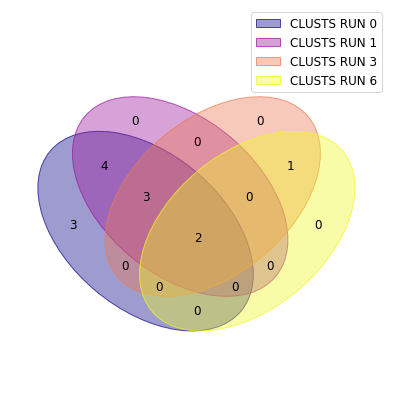

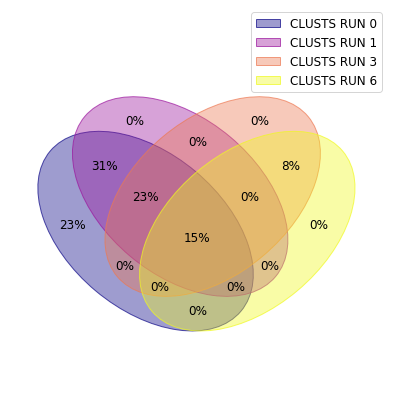

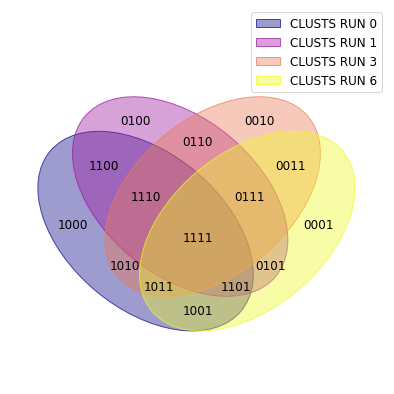

In [70]:
# for +6 sets go to pseudovenn function
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
# this diagram presents the relationship in numerical values 
venn(david_clusters_dic, cmap='plasma', 
     fontsize=12, figsize=(22,7), legend_loc=1)
# this diagram presents the relationship in percentual values 
venn(david_clusters_dic, cmap='plasma', 
     fontsize=12, figsize=(22,7), legend_loc=1, fmt="{percentage:.0f}%")
# this diagram presents the relationship in logical values 
venn(david_clusters_dic, cmap='plasma', 
     fontsize=12, figsize=(22,7), legend_loc=1, fmt="{logic}")

### Here, the petals are evaluated with a specific filter and are present only the relations asked for

In [73]:
from venn import generate_petal_labels
from venn import generate_colors
from venn import draw_venn

# build a dictionary with the logical references and values
petal_labels2 = generate_petal_labels(david_clusters_dic.values(), fmt="{size}")
petal_labels2

{'0001': '0',
 '0010': '0',
 '0011': '1',
 '0100': '0',
 '0101': '0',
 '0110': '0',
 '0111': '0',
 '1000': '3',
 '1001': '0',
 '1010': '0',
 '1011': '0',
 '1100': '4',
 '1101': '0',
 '1110': '3',
 '1111': '2'}

In [74]:
# specify a filter to consider only relation with +1 value, otherwise print nothing
significance_filter = lambda value: value if int(value) >= 1 else "ns"
# apply the filter to the dict only in the asked relations
petal_labels2 = {
    logic: significance_filter(value)
    for logic, value in petal_labels2.items()
}
for logic in "0001", "0010", "0100", "0101", "0110", "0111", "1001", "1010", "1011", "1101", "1000" :
    del petal_labels2[logic]
petal_labels2

{'0011': '1', '1100': '4', '1110': '3', '1111': '2'}

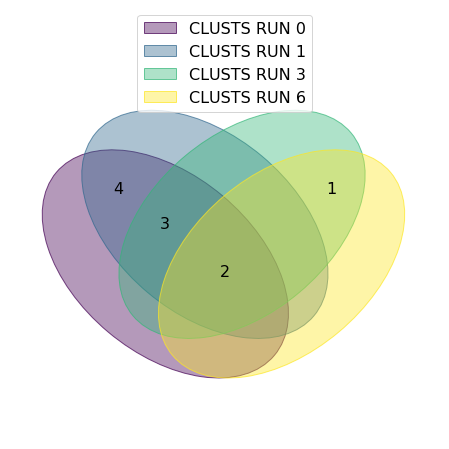

In [99]:
# draw the venn with the filter applied
draw_venn(
    petal_labels=petal_labels2, dataset_labels=david_clusters_dic.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=16, legend_loc=9, ax=None
)

### Logical operations

In [78]:
# logical operations need to be as set dtype
set0 = {'C1', 'C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13'}
set1 = {'C1', 'C3','C4','C5','C6','C7','C8','C9','C10'}
set3 = {'C1', 'C2','C3','C4','C7','C9'}
set6 = {'C1', 'C2','C3'}

In [79]:
union = set0.intersection(set1)
lst = list(union)
#type(lst)
lst2 = sorted(lst, reverse=False)
lst2

['C1', 'C10', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

In [80]:
union = set0.intersection(set3)
lst = list(union)
#type(lst)
lst2 = sorted(lst, reverse=False)
lst2

['C1', 'C3', 'C4', 'C7', 'C9']

In [81]:
union = set0.intersection(set6)
lst = list(union)
#type(lst)
lst2 = sorted(lst, reverse=False)
lst2

['C1', 'C3']

In [82]:
union = set1.intersection(set3)
lst = list(union)
#type(lst)
lst2 = sorted(lst, reverse=False)
lst2

['C1', 'C3', 'C4', 'C7', 'C9']

In [83]:
union = set1.intersection(set6)
lst = list(union)
#type(lst)
lst2 = sorted(lst, reverse=False)
lst2

['C1', 'C3']

In [84]:
union = set3.intersection(set6)
lst = list(union)
#type(lst)
lst2 = sorted(lst, reverse=False)
lst2

['C1', 'C2', 'C3']

In [90]:
#set0.intersection(set1, set3)
set1.intersection(set3, set6)
#set0.intersection(set1, set3, set6)

{'C1', 'C3'}

In [34]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [ ]:
# Igualdad
set1_ctrl == set2_infect

# Subconjunto
# ¿estan los genes del conjunto de infectadas en el conjunto de control?
set2_infect.issubset(set1_ctrl)

## Subconjunto propio
# set2_infect != set1_ctrl
set2_infect.issubset(set1_ctrl) and set2_infect != set1_ctrl
#               FALSE AND TRUE

union=set2_infect.union(set1_ctrl)
len(union)

# Intersección de conjuntos
intersec=set2_infect.intersection(set1_ctrl)
lst_intersec=list(intersec)
print(lst_intersec)
len(lst_intersec)

## Alternative plots for 3,4,5, 6 sets

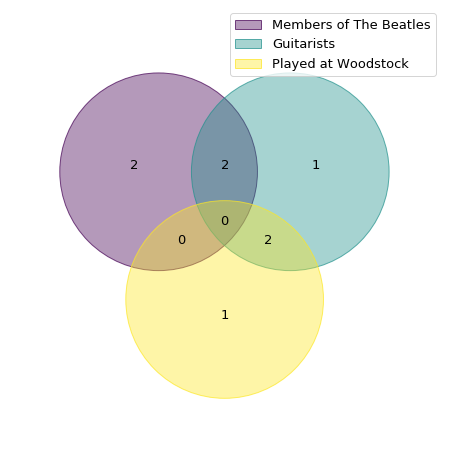

In [5]:

%matplotlib inline

musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}
venn(musicians)


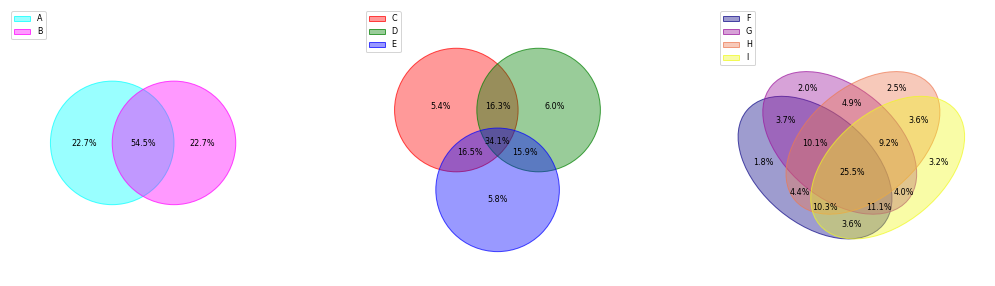

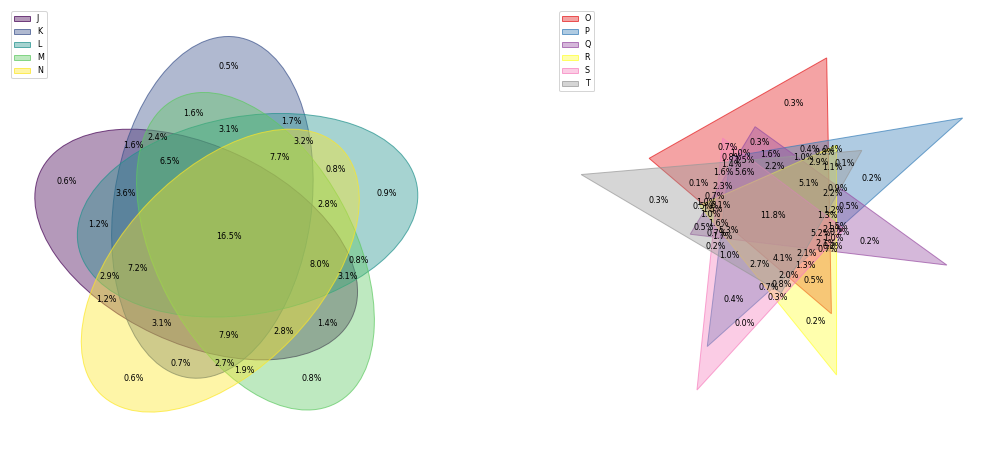

In [8]:
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice

_, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)

for n_sets, cmap, ax in zip(range(2, 7), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(1000, 700, replace=False))
        for name in islice(letters, n_sets)
    }
    venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

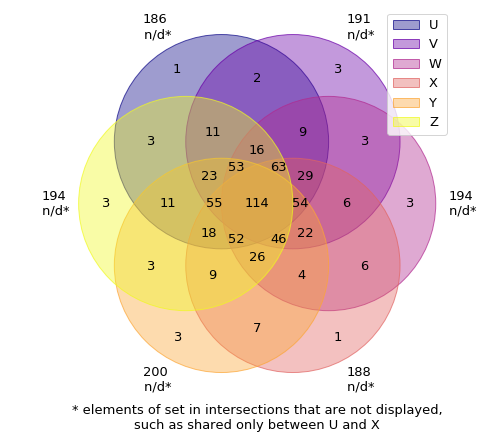

In [10]:
from venn import pseudovenn

dataset_dict = {
    name: set(choice(1000, 700, replace=False))
    for name in islice(letters, 6)
}
pseudovenn(dataset_dict, cmap="plasma")

In [4]:
#https://installati.one/ubuntu/20.04/python3-matplotlib-venn/
#https://pypi.org/project/venn/

In [17]:
list(dataset_dict.keys())[1]
list(dataset_dict.keys())
# for key in dataset_dict:
#     print(key, dataset_dict[key],'\n')

# for item in dataset_dict.items():
#     print(item)
#     print(type(item))

# for key, value in dataset_dict.items():
#     print(key, '->', value)

'V'

In [19]:
dir({})

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']